In [38]:
# Read Data
import numpy as np
import pandas as pd
raw_data = pd.read_csv("data_10_states_temp_precip.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 6 columns):
State            1234 non-null object
Month            1234 non-null object
Year             1234 non-null int64
Crop Yield       1234 non-null float64
Temperature      1234 non-null float64
Precipitation    1234 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 57.9+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8aeea43c8>,
      dtype=object)

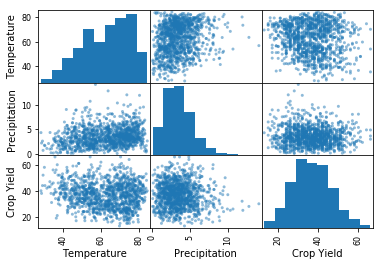

In [45]:
from pandas.plotting import scatter_matrix

attributes = ["Temperature", "Precipitation", "Crop Yield"]
scatter_matrix(raw_data[attributes])

In [34]:
# split into test and training data
from sklearn.model_selection import train_test_split

raw_train_set, raw_test_set = train_test_split(raw_data, test_size = 0.2)

In [46]:
# data preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_attribs = ["Temperature", "Precipitation"]
cat_attribs = ["Month"]

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(sparse=False), cat_attribs),
    ])

X_train = full_pipeline.fit_transform(raw_train_set)
Y_train = raw_train_set["Crop Yield"].values

X_test = full_pipeline.fit_transform(raw_test_set)
Y_test = raw_test_set["Crop Yield"].values


In [36]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
from sklearn.metrics import mean_squared_error

lin_reg_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(Y_test, lin_reg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

8.455389745835516

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [50]:
tree_reg_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(Y_test, tree_reg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

11.437030559380103